In [2]:
# 기본
import re
import itertools
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.externals import joblib 
from sklearn.metrics import make_scorer

# 회귀분석
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# Deep Neural Network
import tensorflow as tf
#from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
# from keras.layers.recurrent import LSTM
# from keras.models import Sequential
# import time


# 인코딩
from sklearn.preprocessing import LabelEncoder
# 설정
%matplotlib inline
pd.options.display.max_columns = 400
pd.options.display.float_format = '{:.5f}'.format



/home/sundooedu/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [3]:
import lightgbm as lgb

In [4]:
def grap_year(data):
    data = str(data)
    return int(data[:4])

def grap_month(data):
    data = str(data)
    return int(data[4:])

In [5]:
data = pd.read_csv('201901-202003.csv')

In [6]:
data.isnull().sum()

REG_YYMM             0
CARD_SIDO_NM         0
CARD_CCG_NM      87213
STD_CLSS_NM          0
HOM_SIDO_NM          0
HOM_CCG_NM      147787
AGE                  0
SEX_CTGO_CD          0
FLC                  0
CSTMR_CNT            0
AMT                  0
CNT                  0
dtype: int64

In [7]:
data = data.fillna('') # Null에 ''로 채워넣음

In [8]:
data.isnull().sum()

REG_YYMM        0
CARD_SIDO_NM    0
CARD_CCG_NM     0
STD_CLSS_NM     0
HOM_SIDO_NM     0
HOM_CCG_NM      0
AGE             0
SEX_CTGO_CD     0
FLC             0
CSTMR_CNT       0
AMT             0
CNT             0
dtype: int64

# EDA

In [9]:
data.CARD_SIDO_NM.value_counts()

서울    6259502
경기    5188230
부산    2030810
인천    1278410
강원    1230355
경남    1222818
경북    1204831
충남    1178159
충북     834707
전북     829466
전남     819291
대구     758424
대전     523121
제주     497503
광주     432150
울산     322802
세종      87213
Name: CARD_SIDO_NM, dtype: int64

In [10]:
data.groupby('CARD_SIDO_NM')['AMT'].sum()

CARD_SIDO_NM
강원     1589611299919
경기    14201885234869
경남     3485130029864
경북     2767620595248
광주     1705650360934
대구     3020064352604
대전     1128913460716
부산     4491306031541
서울    14677131049031
세종      204045817348
울산     1255213605740
인천     3056247462913
전남     1839760777139
전북     1961230185341
제주     1343582224768
충남     2103197375108
충북     1465437185923
Name: AMT, dtype: int64

In [11]:
data.STD_CLSS_NM.value_counts().sort_values(ascending=[False])

한식 음식점업                  3697166
체인화 편의점                  3210466
슈퍼마켓                     1630700
차량용 주유소 운영업              1613476
비알콜 음료점업                 1586120
기타 대형 종합 소매업             1495163
서양식 음식점업                 1404839
피자 햄버거 샌드위치 및 유사 음식점업    1351478
빵 및 과자류 소매업               989794
중식 음식점업                   698803
기타음식료품위주종합소매업             558716
기타 외국식 음식점업               556813
일식 음식점업                   539071
과실 및 채소 소매업               504479
스포츠 및 레크레이션 용품 임대업        466533
화장품 및 방향제 소매업             383713
택시 운송업                    381993
그외 기타 종합 소매업              351817
여관업                       334994
전시 및 행사 대행업               330569
육류 소매업                    327160
욕탕업                       259567
수산물 소매업                   255488
골프장 운영업                   236554
차량용 가스 충전업                218242
버스 운송업                    192281
일반유흥 주점업                  174081
호텔업                       155309
면세점                       144349
정기 항공 운송업                 115914
휴양콘도 운영업  

/home/sundooedu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44536 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sundooedu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50808 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sundooedu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sundooedu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sundooedu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sundooedu/anaconda3/lib/python3.7/site-packages/matplotlib/backe

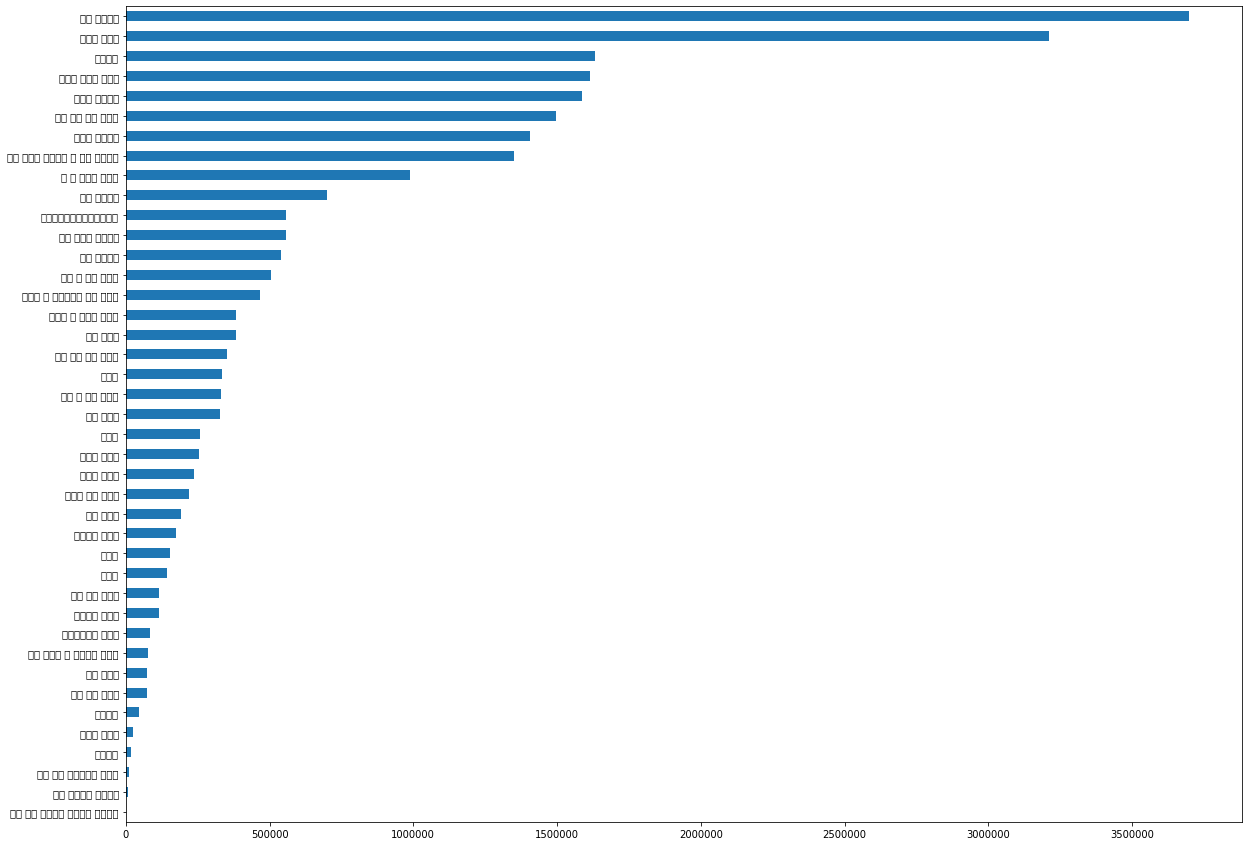

In [12]:
x= data.STD_CLSS_NM.value_counts().sort_values().plot(kind='barh',figsize=[20,15])
plt.show()

In [13]:
data

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3
...,...,...,...,...,...,...,...,...,...,...,...,...
24697787,202003,충북,충주시,휴양콘도 운영업,충북,충주시,30s,1,2,3,43300,4
24697788,202003,충북,충주시,휴양콘도 운영업,충북,충주시,40s,1,3,3,35000,3
24697789,202003,충북,충주시,휴양콘도 운영업,충북,충주시,50s,1,4,4,188000,6
24697790,202003,충북,충주시,휴양콘도 운영업,충북,충주시,50s,2,4,4,99000,6


In [14]:
# 날짜 처리
data = data.fillna('') # Null에 ''로 채워넣음
data['year'] = data['REG_YYMM'].apply(lambda x: grap_year(x))
data['month'] = data['REG_YYMM'].apply(lambda x: grap_month(x))
data = data.drop(['REG_YYMM'], axis=1)

In [15]:
# 데이터 정제
df = data.copy()
df = df.drop(['CARD_CCG_NM', 'HOM_CCG_NM','HOM_SIDO_NM'], axis=1) # 시군구에 대한 데이터 드랍
columns = ['CARD_SIDO_NM', 'STD_CLSS_NM', 'AGE', 'SEX_CTGO_CD', 'FLC', 'year', 'month']

df = df.groupby(columns).sum().reset_index(drop=False)


In [16]:
df.head()

,CARD_SIDO_NM,STD_CLSS_NM,AGE,SEX_CTGO_CD,FLC,year,month,CSTMR_CNT,AMT,CNT
0,강원,건강보조식품 소매업,20s,1,1,2019,1,4,311200,4
1,강원,건강보조식품 소매업,20s,1,1,2019,2,3,605000,3
2,강원,건강보조식품 소매업,20s,1,1,2019,6,3,139000,3
3,강원,건강보조식품 소매업,20s,1,1,2019,7,3,21000,3
4,강원,건강보조식품 소매업,20s,1,1,2019,8,12,95000,12


In [17]:
df.describe()

,SEX_CTGO_CD,FLC,year,month,CSTMR_CNT,AMT,CNT
count,197601.00000,197601.00000,197601.00000,197601.00000,197601.00000,197601.00000,197601.00000
mean,1.48276,2.83427,2019.19488,5.63031,7745.33700,305140293.06029,15754.13342
std,0.49970,1.37399,0.39611,3.59476,33583.39654,1321389979.56086,84462.69561
min,1.00000,1.00000,2019.00000,1.00000,3.00000,1500.00000,1.00000
25%,1.00000,2.00000,2019.00000,2.00000,61.00000,2805520.00000,85.00000
50%,1.00000,3.00000,2019.00000,5.00000,513.00000,22320800.00000,746.00000
75%,2.00000,4.00000,2019.00000,9.00000,3133.00000,133995619.00000,4919.00000
max,2.00000,5.00000,2020.00000,12.00000,851353.00000,43589021962.00000,2724856.00000


In [43]:
# 인코딩
# data type이 object 일 때 encoder로 숫자를 부여 해준다.
dtypes = df.dtypes
encoders = {}
for column in df.columns:
    if str(dtypes[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(df[column])
        encoders[column] = encoder
        
df_num = df.copy()        
for column in encoders.keys():
    encoder = encoders[column]
    df_num[column] = encoder.transform(df[column])

In [46]:
df_num.head()

,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,year,month,CSTMR_CNT,AMT,CNT
0,0,0,0,1,1,1,2019,1,4,311200,4
1,0,0,0,1,1,1,2019,2,3,605000,3
2,0,0,0,1,1,1,2019,6,3,139000,3
3,0,0,0,1,1,1,2019,8,3,27500,3
4,0,0,0,1,1,1,2019,9,3,395500,3


In [49]:
x = df_num.drop(['AMT','CSTMR_CNT','CNT'],axis=1)
#x = df_num.drop(['AMT','CSTMR_CNT','CNT','year','month'],axis=1)
#x = df_num.drop(['AMT','AGE','SEX_CTGO_CD','FLC','HOM_SIDO_NM','CSTMR_CNT','CNT'],axis=1)
y = df_num['AMT']

In [50]:
x_test,x_train,y_test,y_train = train_test_split(x,y,test_size=0.04)

# neural Network

In [ ]:
#regular = 0.1

In [ ]:
model= tf.keras.Sequential()

In [ ]:
model.add(layers.Input(shape=x_train.shape[1]))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(Dropout(0.2))


model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(Dropout(0.2))


model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.2))


model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.2))


model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.2))


model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu',
                     # kernel_regularizer=tf.keras.regularizers.l2(regular),
                     # activity_regularizer=tf.keras.regularizers.l2(regular)
                      ))

model.add(Dropout(0.5))


model.add(layers.Dense(1))

model.compile(optimizer=tf.keras.optimizers.Adam(lr =0.003),loss='mean_squared_logarithmic_error',metrics=['mean_squared_logarithmic_error'])

In [ ]:
hist = model.fit(x_train,y_train,epochs=20 , batch_size = 516 , validation_split =0.3)

In [ ]:
model.evaluate(x_test,y_test, batch_size=516)

In [ ]:
hist.history.keys()

In [ ]:
plt.plot(hist.history['mean_squared_logarithmic_error'],'x--')
plt.plot(hist.history['val_mean_squared_logarithmic_error'],'x--')

# randomforest

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
params= {'n_estimators' : [1,10,100,1000,2000],        
        'max_depth' : [10,8,6,4,2],
        'max_features' : ["sqrt",'log2']
        }

In [53]:
grid = GridSearchCV(RandomForestRegressor(),param_grid=params,refit=True,verbose=True)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [ ]:
grid.best_params_

In [55]:
rf = RandomForestRegressor(max_depth =10, max_features='log2', n_estimators= 2000)

In [56]:
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=2000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [57]:
rf.score(x_test,y_test)

0.24200274174682423

In [58]:
pred = rf.predict(x_test)
pred

array([6.67122592e+07, 3.41137741e+07, 2.02449286e+07, ...,
       9.43774997e+06, 9.63698307e+07, 1.14908164e+08])

In [59]:
from sklearn import metrics
metrics.r2_score(y_test,pred)

0.24200274174682423

In [60]:
metrics.mean_squared_error(y_test,pred)

1.7118086673324986e+17

In [ ]:
train_ds = lgb.Dataset(x_train, label=y_train)
val_ds = lgb.Dataset(x_test, label=y_test)

In [ ]:
params = {
            'learning_rate' : 0.05,
            'boosting_type': 'gbdt',
            'objective': 'tweedie',
            'tweedie_variance_power': 1.1,
            'metric': 'rmse',
            'sub_row' : 0.75,
            'lambda_l2' : 0.1
        }

In [ ]:
model = lgb.train(params,
                  train_ds,
                  2000,
                  val_ds,
                  verbose_eval = 100,
                  early_stopping_rounds = 100
                 )

In [ ]:
model.predict(x_test)

# One hot encoding

In [18]:
df_1hot = pd.get_dummies(df,columns = ['year','month','SEX_CTGO_CD','CARD_SIDO_NM','STD_CLSS_NM','AGE'])
df_1hot

,FLC,CSTMR_CNT,AMT,CNT,year_2019,year_2020,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,SEX_CTGO_CD_1,SEX_CTGO_CD_2,CARD_SIDO_NM_강원,CARD_SIDO_NM_경기,CARD_SIDO_NM_경남,CARD_SIDO_NM_경북,CARD_SIDO_NM_광주,CARD_SIDO_NM_대구,CARD_SIDO_NM_대전,CARD_SIDO_NM_부산,CARD_SIDO_NM_서울,CARD_SIDO_NM_세종,CARD_SIDO_NM_울산,CARD_SIDO_NM_인천,CARD_SIDO_NM_전남,CARD_SIDO_NM_전북,CARD_SIDO_NM_제주,CARD_SIDO_NM_충남,CARD_SIDO_NM_충북,STD_CLSS_NM_건강보조식품 소매업,STD_CLSS_NM_골프장 운영업,STD_CLSS_NM_과실 및 채소 소매업,STD_CLSS_NM_관광 민예품 및 선물용품 소매업,STD_CLSS_NM_그외 기타 분류안된 오락관련 서비스업,STD_CLSS_NM_그외 기타 스포츠시설 운영업,STD_CLSS_NM_그외 기타 종합 소매업,STD_CLSS_NM_기타 대형 종합 소매업,STD_CLSS_NM_기타 수상오락 서비스업,STD_CLSS_NM_기타 외국식 음식점업,STD_CLSS_NM_기타 주점업,STD_CLSS_NM_기타음식료품위주종합소매업,STD_CLSS_NM_내항 여객 운송업,STD_CLSS_NM_마사지업,STD_CLSS_NM_면세점,STD_CLSS_NM_버스 운송업,STD_CLSS_NM_비알콜 음료점업,STD_CLSS_NM_빵 및 과자류 소매업,STD_CLSS_NM_서양식 음식점업,STD_CLSS_NM_수산물 소매업,STD_CLSS_NM_슈퍼마켓,STD_CLSS_NM_스포츠 및 레크레이션 용품 임대업,STD_CLSS_NM_여관업,STD_CLSS_NM_여행사업,STD_CLSS_NM_욕탕업,STD_CLSS_NM_육류 소매업,STD_CLSS_NM_일반유흥 주점업,STD_CLSS_NM_일식 음식점업,STD_CLSS_NM_자동차 임대업,STD_CLSS_NM_전시 및 행사 대행업,STD_CLSS_NM_정기 항공 운송업,STD_CLSS_NM_중식 음식점업,STD_CLSS_NM_차량용 가스 충전업,STD_CLSS_NM_차량용 주유소 운영업,STD_CLSS_NM_체인화 편의점,STD_CLSS_NM_택시 운송업,STD_CLSS_NM_피자 햄버거 샌드위치 및 유사 음식점업,STD_CLSS_NM_한식 음식점업,STD_CLSS_NM_호텔업,STD_CLSS_NM_화장품 및 방향제 소매업,STD_CLSS_NM_휴양콘도 운영업,AGE_10s,AGE_20s,AGE_30s,AGE_40s,AGE_50s,AGE_60s,AGE_70s
0,1,4,311200,4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,3,605000,3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,3,139000,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,3,21000,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,12,95000,12,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197596,5,5,329800,7,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
197597,5,3,333800,5,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
197598,5,16,2670000,21,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
197599,5,3,247800,3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [19]:
x = df_1hot.drop(['AMT','CSTMR_CNT','CNT'],axis=1)
y = df_1hot['AMT']

In [20]:
x_test,x_train,y_test,y_train = train_test_split(x,y,test_size=0.04)

In [21]:
model= tf.keras.Sequential()

In [22]:
model.add(layers.Input(shape=x_train.shape[1]))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(Dropout(0.2))


model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(Dropout(0.2))


model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.2))


model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))

model.add(Dropout(0.5))


model.add(layers.Dense(1))

model.compile(optimizer=tf.keras.optimizers.Adam(lr =0.003),loss='mean_squared_logarithmic_error',metrics=['mean_squared_logarithmic_error'])

In [23]:
hist = model.fit(x_train,y_train,epochs=80 , batch_size = 128 , validation_split =0.3)

Epoch 1/80
44/44 [==============================] - 1s 12ms/step - loss: 48.2819 - mean_squared_logarithmic_error: 48.2819 - val_loss: 8.2442 - val_mean_squared_logarithmic_error: 8.2442
Epoch 2/80
44/44 [==============================] - 0s 8ms/step - loss: 7.1544 - mean_squared_logarithmic_error: 7.1544 - val_loss: 6.7829 - val_mean_squared_logarithmic_error: 6.7829
Epoch 3/80
44/44 [==============================] - 0s 8ms/step - loss: 6.6631 - mean_squared_logarithmic_error: 6.6631 - val_loss: 6.3466 - val_mean_squared_logarithmic_error: 6.3466
Epoch 4/80
44/44 [==============================] - 0s 8ms/step - loss: 6.0452 - mean_squared_logarithmic_error: 6.0452 - val_loss: 5.5001 - val_mean_squared_logarithmic_error: 5.5001
Epoch 5/80
44/44 [==============================] - 0s 8ms/step - loss: 4.8732 - mean_squared_logarithmic_error: 4.8732 - val_loss: 4.0823 - val_mean_squared_logarithmic_error: 4.0823
Epoch 6/80
44/44 [==============================] - 0s 8ms/step - loss: 3.899

44/44 [==============================] - 0s 9ms/step - loss: 0.1023 - mean_squared_logarithmic_error: 0.1023 - val_loss: 1.0117 - val_mean_squared_logarithmic_error: 1.0117
Epoch 46/80
44/44 [==============================] - 0s 9ms/step - loss: 0.1011 - mean_squared_logarithmic_error: 0.1011 - val_loss: 0.9889 - val_mean_squared_logarithmic_error: 0.9889
Epoch 47/80
44/44 [==============================] - 0s 10ms/step - loss: 0.0941 - mean_squared_logarithmic_error: 0.0941 - val_loss: 0.9946 - val_mean_squared_logarithmic_error: 0.9946
Epoch 48/80
44/44 [==============================] - 0s 10ms/step - loss: 0.0927 - mean_squared_logarithmic_error: 0.0927 - val_loss: 0.9862 - val_mean_squared_logarithmic_error: 0.9862
Epoch 49/80
44/44 [==============================] - 0s 9ms/step - loss: 0.1005 - mean_squared_logarithmic_error: 0.1005 - val_loss: 0.9775 - val_mean_squared_logarithmic_error: 0.9775
Epoch 50/80
44/44 [==============================] - 0s 9ms/step - loss: 0.0939 - mea

In [24]:
model.evaluate(x_test,y_test, batch_size=128)

1482/1482 [==============================] - 3s 2ms/step - loss: 1.0136 - mean_squared_logarithmic_error: 1.0136


[1.0135759115219116, 1.0135759115219116]

In [25]:
hist.history.keys()

dict_keys(['loss', 'mean_squared_logarithmic_error', 'val_loss', 'val_mean_squared_logarithmic_error'])

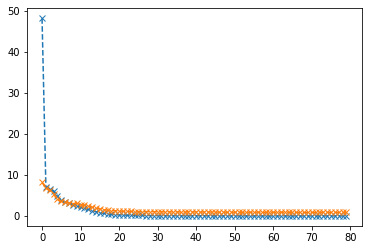

In [26]:
plt.plot(hist.history['mean_squared_logarithmic_error'],'x--')
plt.plot(hist.history['val_mean_squared_logarithmic_error'],'x--')

# 예측 템플릿 만드는법

In [78]:
CARD_SIDO_NMs = df['CARD_SIDO_NM'].unique()
STD_CLSS_NMs  = df['STD_CLSS_NM'].unique()
HOM_SIDO_NMs  = df['HOM_SIDO_NM'].unique()
AGEs          = df['AGE'].unique()
SEX_CTGO_CDs  = df['SEX_CTGO_CD'].unique()
FLCs          = df['FLC'].unique()
years         = [2019,2020]
months        = [1,2,3,4,5,6,7,8,9,10,11,12]

temp = []
for CARD_SIDO_NM in CARD_SIDO_NMs:
    for STD_CLSS_NM in STD_CLSS_NMs:
        #for HOM_SIDO_NM in HOM_SIDO_NMs:
            for AGE in AGEs:
                for SEX_CTGO_CD in SEX_CTGO_CDs:
                    for FLC in FLCs:
                        for year in years:
                            for month in months:
                                temp.append([CARD_SIDO_NM, STD_CLSS_NM, HOM_SIDO_NM, AGE, SEX_CTGO_CD, FLC, year, month])
temp = np.array(temp)
temp = pd.DataFrame(data=temp, columns=['CARD_SIDO_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM', 'AGE', 'SEX_CTGO_CD', 'FLC', 'year', 'month'])

KeyError: 'HOM_SIDO_NM'

In [66]:
temp

,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,year,month
0,강원,건강보조식품 소매업,강원,20s,1,1,2020,4
1,강원,건강보조식품 소매업,강원,20s,1,1,2020,7
2,강원,건강보조식품 소매업,강원,20s,1,2,2020,4
3,강원,건강보조식품 소매업,강원,20s,1,2,2020,7
4,강원,건강보조식품 소매업,강원,20s,1,3,2020,4
...,...,...,...,...,...,...,...,...
1658855,충북,정기 항공 운송업,제주,10s,2,3,2020,7
1658856,충북,정기 항공 운송업,제주,10s,2,4,2020,4
1658857,충북,정기 항공 운송업,제주,10s,2,4,2020,7
1658858,충북,정기 항공 운송업,제주,10s,2,5,2020,4


In [67]:
# 인코딩
# data type이 object 일 때 encoder로 숫자를 부여 해준다.
dtypes = df.dtypes
encoders = {}
for column in temp.columns:
    if str(dtypes[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(temp[column])
        encoders[column] = encoder
        
temp = temp.copy()        
for column in encoders.keys():
    encoder = encoders[column]
    temp[column] = encoder.transform(temp[column])

In [68]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1015098 entries, 1012813 to 680762
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype
---  ------        --------------    -----
 0   CARD_SIDO_NM  1015098 non-null  int64
 1   STD_CLSS_NM   1015098 non-null  int64
 2   HOM_SIDO_NM   1015098 non-null  int64
 3   AGE           1015098 non-null  int64
 4   SEX_CTGO_CD   1015098 non-null  int64
 5   FLC           1015098 non-null  int64
 6   year          1015098 non-null  int64
 7   month         1015098 non-null  int64
dtypes: int64(8)
memory usage: 69.7 MB


In [69]:
temp.columns

Index(['CARD_SIDO_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM', 'AGE', 'SEX_CTGO_CD',
       'FLC', 'year', 'month'],
      dtype='object')

In [70]:
temp = temp[['CARD_SIDO_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM', 'AGE', 'SEX_CTGO_CD','FLC', 'year', 'month']].astype('int')

In [71]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658860 entries, 0 to 1658859
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype
---  ------        --------------    -----
 0   CARD_SIDO_NM  1658860 non-null  int64
 1   STD_CLSS_NM   1658860 non-null  int64
 2   HOM_SIDO_NM   1658860 non-null  int64
 3   AGE           1658860 non-null  int64
 4   SEX_CTGO_CD   1658860 non-null  int64
 5   FLC           1658860 non-null  int64
 6   year          1658860 non-null  int64
 7   month         1658860 non-null  int64
dtypes: int64(8)
memory usage: 101.2 MB


In [72]:
pred = rf.predict(temp)
#pred = np.expm1(pred)
temp['AMT'] = np.round(pred, 0)
temp['REG_YYMM'] = temp['year']*100 + temp['month']
temp = temp[['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT']]
temp = temp.groupby(['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM']).sum().reset_index(drop=False)

In [73]:
# pred = model.predict(temp)
# pred = np.expm1(pred)
# temp['AMT'] = np.round(pred, 0)
# temp['REG_YYMM'] = temp['year']*100 + temp['month']
# temp = temp[['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT']]
# temp = temp.groupby(['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM']).sum().reset_index(drop=False)

In [74]:
# 디코딩 
temp['CARD_SIDO_NM'] = encoders['CARD_SIDO_NM'].inverse_transform(temp['CARD_SIDO_NM'])
temp['STD_CLSS_NM'] = encoders['STD_CLSS_NM'].inverse_transform(temp['STD_CLSS_NM'])

In [76]:
submission = pd.read_csv('submission.csv', index_col=0)
submission = submission.drop(['AMT'], axis=1)
submission = submission.merge(temp, left_on=['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM'], right_on=['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM'], how='left')
submission.index.name = 'id'
submission.to_csv('submission.csv', encoding='utf-8-sig')
submission.head()

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
id,,,,
0,202004,강원,건강보조식품 소매업,27724065482.00000
1,202004,강원,골프장 운영업,30095573463.00000
2,202004,강원,과실 및 채소 소매업,23675220354.00000
3,202004,강원,관광 민예품 및 선물용품 소매업,22411464104.00000
4,202004,강원,그외 기타 분류안된 오락관련 서비스업,22394049145.00000


In [79]:
temp = pd.read_csv('temp.csv')

In [80]:
temp

,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,year,month
0,강원,건강보조식품 소매업,제주,20s,1,1,2019,1
1,강원,건강보조식품 소매업,제주,20s,1,1,2019,2
2,강원,건강보조식품 소매업,제주,20s,1,1,2019,3
3,강원,건강보조식품 소매업,제주,20s,1,1,2019,4
4,강원,건강보조식품 소매업,제주,20s,1,1,2019,5
...,...,...,...,...,...,...,...,...
1170955,충북,정기 항공 운송업,제주,10s,2,5,2020,8
1170956,충북,정기 항공 운송업,제주,10s,2,5,2020,9
1170957,충북,정기 항공 운송업,제주,10s,2,5,2020,10
1170958,충북,정기 항공 운송업,제주,10s,2,5,2020,11


In [81]:
temp_1hot = pd.get_dummies(temp,columns = ['year','month','SEX_CTGO_CD','CARD_SIDO_NM','STD_CLSS_NM','AGE'])

In [82]:
temp_1hot[temp_1hot['month_4']==1]

,HOM_SIDO_NM,FLC,year_2019,year_2020,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,SEX_CTGO_CD_1,SEX_CTGO_CD_2,CARD_SIDO_NM_강원,CARD_SIDO_NM_경기,CARD_SIDO_NM_경남,CARD_SIDO_NM_경북,CARD_SIDO_NM_광주,CARD_SIDO_NM_대구,CARD_SIDO_NM_대전,CARD_SIDO_NM_부산,CARD_SIDO_NM_서울,CARD_SIDO_NM_세종,CARD_SIDO_NM_울산,CARD_SIDO_NM_인천,CARD_SIDO_NM_전남,CARD_SIDO_NM_전북,CARD_SIDO_NM_제주,CARD_SIDO_NM_충남,CARD_SIDO_NM_충북,STD_CLSS_NM_건강보조식품 소매업,STD_CLSS_NM_골프장 운영업,STD_CLSS_NM_과실 및 채소 소매업,STD_CLSS_NM_관광 민예품 및 선물용품 소매업,STD_CLSS_NM_그외 기타 분류안된 오락관련 서비스업,STD_CLSS_NM_그외 기타 스포츠시설 운영업,STD_CLSS_NM_그외 기타 종합 소매업,STD_CLSS_NM_기타 대형 종합 소매업,STD_CLSS_NM_기타 수상오락 서비스업,STD_CLSS_NM_기타 외국식 음식점업,STD_CLSS_NM_기타 주점업,STD_CLSS_NM_기타음식료품위주종합소매업,STD_CLSS_NM_내항 여객 운송업,STD_CLSS_NM_마사지업,STD_CLSS_NM_면세점,STD_CLSS_NM_버스 운송업,STD_CLSS_NM_비알콜 음료점업,STD_CLSS_NM_빵 및 과자류 소매업,STD_CLSS_NM_서양식 음식점업,STD_CLSS_NM_수산물 소매업,STD_CLSS_NM_슈퍼마켓,STD_CLSS_NM_스포츠 및 레크레이션 용품 임대업,STD_CLSS_NM_여관업,STD_CLSS_NM_여행사업,STD_CLSS_NM_욕탕업,STD_CLSS_NM_육류 소매업,STD_CLSS_NM_일반유흥 주점업,STD_CLSS_NM_일식 음식점업,STD_CLSS_NM_자동차 임대업,STD_CLSS_NM_전시 및 행사 대행업,STD_CLSS_NM_정기 항공 운송업,STD_CLSS_NM_중식 음식점업,STD_CLSS_NM_차량용 가스 충전업,STD_CLSS_NM_차량용 주유소 운영업,STD_CLSS_NM_체인화 편의점,STD_CLSS_NM_택시 운송업,STD_CLSS_NM_피자 햄버거 샌드위치 및 유사 음식점업,STD_CLSS_NM_한식 음식점업,STD_CLSS_NM_호텔업,STD_CLSS_NM_화장품 및 방향제 소매업,STD_CLSS_NM_휴양콘도 운영업,AGE_10s,AGE_20s,AGE_30s,AGE_40s,AGE_50s,AGE_60s,AGE_70s
3,제주,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
15,제주,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
27,제주,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
39,제주,2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
51,제주,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170903,제주,3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1170915,제주,4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1170927,제주,4,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1170939,제주,5,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [83]:
year20=temp_1hot[temp_1hot['year_2020']==1]
year20.head()

,HOM_SIDO_NM,FLC,year_2019,year_2020,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,SEX_CTGO_CD_1,SEX_CTGO_CD_2,CARD_SIDO_NM_강원,CARD_SIDO_NM_경기,CARD_SIDO_NM_경남,CARD_SIDO_NM_경북,CARD_SIDO_NM_광주,CARD_SIDO_NM_대구,CARD_SIDO_NM_대전,CARD_SIDO_NM_부산,CARD_SIDO_NM_서울,CARD_SIDO_NM_세종,CARD_SIDO_NM_울산,CARD_SIDO_NM_인천,CARD_SIDO_NM_전남,CARD_SIDO_NM_전북,CARD_SIDO_NM_제주,CARD_SIDO_NM_충남,CARD_SIDO_NM_충북,STD_CLSS_NM_건강보조식품 소매업,STD_CLSS_NM_골프장 운영업,STD_CLSS_NM_과실 및 채소 소매업,STD_CLSS_NM_관광 민예품 및 선물용품 소매업,STD_CLSS_NM_그외 기타 분류안된 오락관련 서비스업,STD_CLSS_NM_그외 기타 스포츠시설 운영업,STD_CLSS_NM_그외 기타 종합 소매업,STD_CLSS_NM_기타 대형 종합 소매업,STD_CLSS_NM_기타 수상오락 서비스업,STD_CLSS_NM_기타 외국식 음식점업,STD_CLSS_NM_기타 주점업,STD_CLSS_NM_기타음식료품위주종합소매업,STD_CLSS_NM_내항 여객 운송업,STD_CLSS_NM_마사지업,STD_CLSS_NM_면세점,STD_CLSS_NM_버스 운송업,STD_CLSS_NM_비알콜 음료점업,STD_CLSS_NM_빵 및 과자류 소매업,STD_CLSS_NM_서양식 음식점업,STD_CLSS_NM_수산물 소매업,STD_CLSS_NM_슈퍼마켓,STD_CLSS_NM_스포츠 및 레크레이션 용품 임대업,STD_CLSS_NM_여관업,STD_CLSS_NM_여행사업,STD_CLSS_NM_욕탕업,STD_CLSS_NM_육류 소매업,STD_CLSS_NM_일반유흥 주점업,STD_CLSS_NM_일식 음식점업,STD_CLSS_NM_자동차 임대업,STD_CLSS_NM_전시 및 행사 대행업,STD_CLSS_NM_정기 항공 운송업,STD_CLSS_NM_중식 음식점업,STD_CLSS_NM_차량용 가스 충전업,STD_CLSS_NM_차량용 주유소 운영업,STD_CLSS_NM_체인화 편의점,STD_CLSS_NM_택시 운송업,STD_CLSS_NM_피자 햄버거 샌드위치 및 유사 음식점업,STD_CLSS_NM_한식 음식점업,STD_CLSS_NM_호텔업,STD_CLSS_NM_화장품 및 방향제 소매업,STD_CLSS_NM_휴양콘도 운영업,AGE_10s,AGE_20s,AGE_30s,AGE_40s,AGE_50s,AGE_60s,AGE_70s
12,제주,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
13,제주,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
14,제주,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
15,제주,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
16,제주,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [84]:
mth04 = year20[year20['month_4']==1]
mth07 = year20[year20['month_7']==1]

In [85]:
subdf = pd.concat([mth04,mth07]).reset_index()

In [86]:
subdf = subdf.drop(['index','HOM_SIDO_NM'],axis=1)

In [87]:
subdf

,FLC,year_2019,year_2020,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,SEX_CTGO_CD_1,SEX_CTGO_CD_2,CARD_SIDO_NM_강원,CARD_SIDO_NM_경기,CARD_SIDO_NM_경남,CARD_SIDO_NM_경북,CARD_SIDO_NM_광주,CARD_SIDO_NM_대구,CARD_SIDO_NM_대전,CARD_SIDO_NM_부산,CARD_SIDO_NM_서울,CARD_SIDO_NM_세종,CARD_SIDO_NM_울산,CARD_SIDO_NM_인천,CARD_SIDO_NM_전남,CARD_SIDO_NM_전북,CARD_SIDO_NM_제주,CARD_SIDO_NM_충남,CARD_SIDO_NM_충북,STD_CLSS_NM_건강보조식품 소매업,STD_CLSS_NM_골프장 운영업,STD_CLSS_NM_과실 및 채소 소매업,STD_CLSS_NM_관광 민예품 및 선물용품 소매업,STD_CLSS_NM_그외 기타 분류안된 오락관련 서비스업,STD_CLSS_NM_그외 기타 스포츠시설 운영업,STD_CLSS_NM_그외 기타 종합 소매업,STD_CLSS_NM_기타 대형 종합 소매업,STD_CLSS_NM_기타 수상오락 서비스업,STD_CLSS_NM_기타 외국식 음식점업,STD_CLSS_NM_기타 주점업,STD_CLSS_NM_기타음식료품위주종합소매업,STD_CLSS_NM_내항 여객 운송업,STD_CLSS_NM_마사지업,STD_CLSS_NM_면세점,STD_CLSS_NM_버스 운송업,STD_CLSS_NM_비알콜 음료점업,STD_CLSS_NM_빵 및 과자류 소매업,STD_CLSS_NM_서양식 음식점업,STD_CLSS_NM_수산물 소매업,STD_CLSS_NM_슈퍼마켓,STD_CLSS_NM_스포츠 및 레크레이션 용품 임대업,STD_CLSS_NM_여관업,STD_CLSS_NM_여행사업,STD_CLSS_NM_욕탕업,STD_CLSS_NM_육류 소매업,STD_CLSS_NM_일반유흥 주점업,STD_CLSS_NM_일식 음식점업,STD_CLSS_NM_자동차 임대업,STD_CLSS_NM_전시 및 행사 대행업,STD_CLSS_NM_정기 항공 운송업,STD_CLSS_NM_중식 음식점업,STD_CLSS_NM_차량용 가스 충전업,STD_CLSS_NM_차량용 주유소 운영업,STD_CLSS_NM_체인화 편의점,STD_CLSS_NM_택시 운송업,STD_CLSS_NM_피자 햄버거 샌드위치 및 유사 음식점업,STD_CLSS_NM_한식 음식점업,STD_CLSS_NM_호텔업,STD_CLSS_NM_화장품 및 방향제 소매업,STD_CLSS_NM_휴양콘도 운영업,AGE_10s,AGE_20s,AGE_30s,AGE_40s,AGE_50s,AGE_60s,AGE_70s
0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,4,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97575,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
97576,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
97577,3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
97578,4,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [88]:
x_train

,FLC,year_2019,year_2020,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,SEX_CTGO_CD_1,SEX_CTGO_CD_2,CARD_SIDO_NM_강원,CARD_SIDO_NM_경기,CARD_SIDO_NM_경남,CARD_SIDO_NM_경북,CARD_SIDO_NM_광주,CARD_SIDO_NM_대구,CARD_SIDO_NM_대전,CARD_SIDO_NM_부산,CARD_SIDO_NM_서울,CARD_SIDO_NM_세종,CARD_SIDO_NM_울산,CARD_SIDO_NM_인천,CARD_SIDO_NM_전남,CARD_SIDO_NM_전북,CARD_SIDO_NM_제주,CARD_SIDO_NM_충남,CARD_SIDO_NM_충북,STD_CLSS_NM_건강보조식품 소매업,STD_CLSS_NM_골프장 운영업,STD_CLSS_NM_과실 및 채소 소매업,STD_CLSS_NM_관광 민예품 및 선물용품 소매업,STD_CLSS_NM_그외 기타 분류안된 오락관련 서비스업,STD_CLSS_NM_그외 기타 스포츠시설 운영업,STD_CLSS_NM_그외 기타 종합 소매업,STD_CLSS_NM_기타 대형 종합 소매업,STD_CLSS_NM_기타 수상오락 서비스업,STD_CLSS_NM_기타 외국식 음식점업,STD_CLSS_NM_기타 주점업,STD_CLSS_NM_기타음식료품위주종합소매업,STD_CLSS_NM_내항 여객 운송업,STD_CLSS_NM_마사지업,STD_CLSS_NM_면세점,STD_CLSS_NM_버스 운송업,STD_CLSS_NM_비알콜 음료점업,STD_CLSS_NM_빵 및 과자류 소매업,STD_CLSS_NM_서양식 음식점업,STD_CLSS_NM_수산물 소매업,STD_CLSS_NM_슈퍼마켓,STD_CLSS_NM_스포츠 및 레크레이션 용품 임대업,STD_CLSS_NM_여관업,STD_CLSS_NM_여행사업,STD_CLSS_NM_욕탕업,STD_CLSS_NM_육류 소매업,STD_CLSS_NM_일반유흥 주점업,STD_CLSS_NM_일식 음식점업,STD_CLSS_NM_자동차 임대업,STD_CLSS_NM_전시 및 행사 대행업,STD_CLSS_NM_정기 항공 운송업,STD_CLSS_NM_중식 음식점업,STD_CLSS_NM_차량용 가스 충전업,STD_CLSS_NM_차량용 주유소 운영업,STD_CLSS_NM_체인화 편의점,STD_CLSS_NM_택시 운송업,STD_CLSS_NM_피자 햄버거 샌드위치 및 유사 음식점업,STD_CLSS_NM_한식 음식점업,STD_CLSS_NM_호텔업,STD_CLSS_NM_화장품 및 방향제 소매업,STD_CLSS_NM_휴양콘도 운영업,AGE_10s,AGE_20s,AGE_30s,AGE_40s,AGE_50s,AGE_60s,AGE_70s
68896,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
69506,4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
57667,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
68016,4,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
82057,4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191968,4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
61441,4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
132054,5,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
45963,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [56]:
# subdf.columns =[['FLC', 'year_2019', 'year_2020', 'month_1', 'month_2', 'month_3',\
#        'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',\
#        'month_10', 'month_11', 'month_12', 'SEX_CTGO_CD_1', 'SEX_CTGO_CD_2',\
#        'CARD_SIDO_NM_강원', 'CARD_SIDO_NM_경기', 'CARD_SIDO_NM_경남',\
#        'CARD_SIDO_NM_경북', 'CARD_SIDO_NM_광주', 'CARD_SIDO_NM_대구',\
#        'CARD_SIDO_NM_대전', 'CARD_SIDO_NM_부산', 'CARD_SIDO_NM_서울',\
#        'CARD_SIDO_NM_세종', 'CARD_SIDO_NM_울산', 'CARD_SIDO_NM_인천',\
#        'CARD_SIDO_NM_전남', 'CARD_SIDO_NM_전북', 'CARD_SIDO_NM_제주',\
#        'CARD_SIDO_NM_충남', 'CARD_SIDO_NM_충북', 'STD_CLSS_NM_건강보조식품 소매업',\
#        'STD_CLSS_NM_골프장 운영업', 'STD_CLSS_NM_과실 및 채소 소매업',\
#        'STD_CLSS_NM_관광 민예품 및 선물용품 소매업', 'STD_CLSS_NM_그외 기타 분류안된 오락관련 서비스업',\
#        'STD_CLSS_NM_그외 기타 스포츠시설 운영업', 'STD_CLSS_NM_그외 기타 종합 소매업',\
#        'STD_CLSS_NM_기타 대형 종합 소매업', 'STD_CLSS_NM_기타 수상오락 서비스업',\
#        'STD_CLSS_NM_기타 외국식 음식점업', 'STD_CLSS_NM_기타 주점업',\
#        'STD_CLSS_NM_기타음식료품위주종합소매업', 'STD_CLSS_NM_내항 여객 운송업',\
#        'STD_CLSS_NM_마사지업', 'STD_CLSS_NM_면세점', 'STD_CLSS_NM_버스 운송업',\
#        'STD_CLSS_NM_비알콜 음료점업', 'STD_CLSS_NM_빵 및 과자류 소매업',\
#        'STD_CLSS_NM_서양식 음식점업', 'STD_CLSS_NM_수산물 소매업', 'STD_CLSS_NM_슈퍼마켓',\
#        'STD_CLSS_NM_스포츠 및 레크레이션 용품 임대업', 'STD_CLSS_NM_여관업', 'STD_CLSS_NM_여행사업',\
#        'STD_CLSS_NM_욕탕업', 'STD_CLSS_NM_육류 소매업', 'STD_CLSS_NM_일반유흥 주점업',\
#        'STD_CLSS_NM_일식 음식점업', 'STD_CLSS_NM_자동차 임대업', 'STD_CLSS_NM_전시 및 행사 대행업',\
#        'STD_CLSS_NM_정기 항공 운송업', 'STD_CLSS_NM_중식 음식점업',\
#        'STD_CLSS_NM_차량용 가스 충전업', 'STD_CLSS_NM_차량용 주유소 운영업',\
#        'STD_CLSS_NM_체인화 편의점', 'STD_CLSS_NM_택시 운송업',\
#        'STD_CLSS_NM_피자 햄버거 샌드위치 및 유사 음식점업', 'STD_CLSS_NM_한식 음식점업',\
#        'STD_CLSS_NM_호텔업', 'STD_CLSS_NM_화장품 및 방향제 소매업', 'STD_CLSS_NM_휴양콘도 운영업',\
#        'AGE_10s', 'AGE_20s', 'AGE_30s', 'AGE_40s', 'AGE_50s', 'AGE_60s',\
#        'AGE_70s']]

In [76]:
x_train.columns

Index(['FLC', 'year_2019', 'year_2020', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'SEX_CTGO_CD_1', 'SEX_CTGO_CD_2',
       'CARD_SIDO_NM_강원', 'CARD_SIDO_NM_경기', 'CARD_SIDO_NM_경남',
       'CARD_SIDO_NM_경북', 'CARD_SIDO_NM_광주', 'CARD_SIDO_NM_대구',
       'CARD_SIDO_NM_대전', 'CARD_SIDO_NM_부산', 'CARD_SIDO_NM_서울',
       'CARD_SIDO_NM_세종', 'CARD_SIDO_NM_울산', 'CARD_SIDO_NM_인천',
       'CARD_SIDO_NM_전남', 'CARD_SIDO_NM_전북', 'CARD_SIDO_NM_제주',
       'CARD_SIDO_NM_충남', 'CARD_SIDO_NM_충북', 'STD_CLSS_NM_건강보조식품 소매업',
       'STD_CLSS_NM_골프장 운영업', 'STD_CLSS_NM_과실 및 채소 소매업',
       'STD_CLSS_NM_관광 민예품 및 선물용품 소매업', 'STD_CLSS_NM_그외 기타 분류안된 오락관련 서비스업',
       'STD_CLSS_NM_그외 기타 스포츠시설 운영업', 'STD_CLSS_NM_그외 기타 종합 소매업',
       'STD_CLSS_NM_기타 대형 종합 소매업', 'STD_CLSS_NM_기타 수상오락 서비스업',
       'STD_CLSS_NM_기타 외국식 음식점업', 'STD_CLSS_NM_기타 주점업',
       'STD_CLSS_NM_기타음식료품위주종합소매업', 'STD_CLSS_NM_내항 여객 운송업',
       

In [77]:
subdf.columns

Index(['FLC', 'year_2019', 'year_2020', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_12', 'SEX_CTGO_CD_1', 'SEX_CTGO_CD_2',
       'CARD_SIDO_NM_강원', 'CARD_SIDO_NM_경기', 'CARD_SIDO_NM_경남',
       'CARD_SIDO_NM_경북', 'CARD_SIDO_NM_광주', 'CARD_SIDO_NM_대구',
       'CARD_SIDO_NM_대전', 'CARD_SIDO_NM_부산', 'CARD_SIDO_NM_서울',
       'CARD_SIDO_NM_세종', 'CARD_SIDO_NM_울산', 'CARD_SIDO_NM_인천',
       'CARD_SIDO_NM_전남', 'CARD_SIDO_NM_전북', 'CARD_SIDO_NM_제주',
       'CARD_SIDO_NM_충남', 'CARD_SIDO_NM_충북', 'STD_CLSS_NM_건강보조식품 소매업',
       'STD_CLSS_NM_골프장 운영업', 'STD_CLSS_NM_과실 및 채소 소매업',
       'STD_CLSS_NM_관광 민예품 및 선물용품 소매업', 'STD_CLSS_NM_그외 기타 분류안된 오락관련 서비스업',
       'STD_CLSS_NM_그외 기타 스포츠시설 운영업', 'STD_CLSS_NM_그외 기타 종합 소매업',
       'STD_CLSS_NM_기타 대형 종합 소매업', 'STD_CLSS_NM_기타 수상오락 서비스업',
       'STD_CLSS_NM_기타 외국식 음식점업', 'STD_CLSS_NM_기타 주점업',
       'STD_CLSS_NM_기타음식료품위주종합소매업', 'STD_CLSS_NM_내항 여객 운송업',
       'STD_CLSS_NM

In [60]:
model

# predict

In [89]:
model.predict(subdf)

array([[402840.9 ],
       [228248.19],
       [267198.78],
       ...,
       [327426.6 ],
       [175448.06],
       [186880.81]], dtype=float32)

In [90]:
result = model.predict(subdf)

In [162]:
subdf

,FLC,year_2019,year_2020,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,SEX_CTGO_CD_1,SEX_CTGO_CD_2,CARD_SIDO_NM_강원,CARD_SIDO_NM_경기,CARD_SIDO_NM_경남,CARD_SIDO_NM_경북,CARD_SIDO_NM_광주,CARD_SIDO_NM_대구,CARD_SIDO_NM_대전,CARD_SIDO_NM_부산,CARD_SIDO_NM_서울,CARD_SIDO_NM_세종,CARD_SIDO_NM_울산,CARD_SIDO_NM_인천,CARD_SIDO_NM_전남,CARD_SIDO_NM_전북,CARD_SIDO_NM_제주,CARD_SIDO_NM_충남,CARD_SIDO_NM_충북,STD_CLSS_NM_건강보조식품 소매업,STD_CLSS_NM_골프장 운영업,STD_CLSS_NM_과실 및 채소 소매업,STD_CLSS_NM_관광 민예품 및 선물용품 소매업,STD_CLSS_NM_그외 기타 분류안된 오락관련 서비스업,STD_CLSS_NM_그외 기타 스포츠시설 운영업,STD_CLSS_NM_그외 기타 종합 소매업,STD_CLSS_NM_기타 대형 종합 소매업,STD_CLSS_NM_기타 수상오락 서비스업,STD_CLSS_NM_기타 외국식 음식점업,STD_CLSS_NM_기타 주점업,STD_CLSS_NM_기타음식료품위주종합소매업,STD_CLSS_NM_내항 여객 운송업,STD_CLSS_NM_마사지업,STD_CLSS_NM_면세점,STD_CLSS_NM_버스 운송업,STD_CLSS_NM_비알콜 음료점업,STD_CLSS_NM_빵 및 과자류 소매업,STD_CLSS_NM_서양식 음식점업,STD_CLSS_NM_수산물 소매업,STD_CLSS_NM_슈퍼마켓,STD_CLSS_NM_스포츠 및 레크레이션 용품 임대업,STD_CLSS_NM_여관업,STD_CLSS_NM_여행사업,STD_CLSS_NM_욕탕업,STD_CLSS_NM_육류 소매업,STD_CLSS_NM_일반유흥 주점업,STD_CLSS_NM_일식 음식점업,STD_CLSS_NM_자동차 임대업,STD_CLSS_NM_전시 및 행사 대행업,STD_CLSS_NM_정기 항공 운송업,STD_CLSS_NM_중식 음식점업,STD_CLSS_NM_차량용 가스 충전업,STD_CLSS_NM_차량용 주유소 운영업,STD_CLSS_NM_체인화 편의점,STD_CLSS_NM_택시 운송업,STD_CLSS_NM_피자 햄버거 샌드위치 및 유사 음식점업,STD_CLSS_NM_한식 음식점업,STD_CLSS_NM_호텔업,STD_CLSS_NM_화장품 및 방향제 소매업,STD_CLSS_NM_휴양콘도 운영업,AGE_10s,AGE_20s,AGE_30s,AGE_40s,AGE_50s,AGE_60s,AGE_70s
0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,4,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97575,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
97576,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
97577,3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
97578,4,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [163]:
year = subdf[['year_2019','year_2020']].idxmax(1)
year = year.replace("year_2019","2019").replace("year_2020","2020")
year.head()

0    2020
1    2020
2    2020
3    2020
4    2020
dtype: object

In [164]:
year

0        2020
1        2020
2        2020
3        2020
4        2020
         ... 
97575    2020
97576    2020
97577    2020
97578    2020
97579    2020
Length: 97580, dtype: object

In [165]:
# month
month =subdf[['month_1','month_2', 'month_3', 'month_4', 'month_5',\
                'month_6','month_7', 'month_8', 'month_9', 'month_10',\
                'month_11','month_12']].idxmax(1)

month = month.replace("month_1","01").replace("month_2","02").replace("month_3","03").replace("month_4","04").replace("month_5","05")\
.replace("month_6","06").replace("month_7","07").replace("month_8","08").replace("month_9","09").replace("month_10","10")\
.replace("month_11","11").replace("month_12","12")

In [166]:
card_sido = subdf[['CARD_SIDO_NM_강원', 'CARD_SIDO_NM_경기', 'CARD_SIDO_NM_경남',
       'CARD_SIDO_NM_경북', 'CARD_SIDO_NM_광주', 'CARD_SIDO_NM_대구',
       'CARD_SIDO_NM_대전', 'CARD_SIDO_NM_부산', 'CARD_SIDO_NM_서울',
       'CARD_SIDO_NM_세종', 'CARD_SIDO_NM_울산', 'CARD_SIDO_NM_인천',
       'CARD_SIDO_NM_전남', 'CARD_SIDO_NM_전북', 'CARD_SIDO_NM_제주',
       'CARD_SIDO_NM_충남', 'CARD_SIDO_NM_충북']].idxmax(1)

In [167]:
card_sido=card_sido.replace("CARD_SIDO_NM_강원","강원").replace("CARD_SIDO_NM_경기","경기").replace("CARD_SIDO_NM_경남","경남").replace("CARD_SIDO_NM_경북","경북")\
.replace("CARD_SIDO_NM_광주","광주").replace("CARD_SIDO_NM_대구","대구").replace("CARD_SIDO_NM_대전","대전").replace("CARD_SIDO_NM_부산","부산")\
.replace("CARD_SIDO_NM_서울","서울").replace("CARD_SIDO_NM_세종","세종").replace("CARD_SIDO_NM_울산","울산").replace("CARD_SIDO_NM_인천","인천")\
.replace("CARD_SIDO_NM_전남","전남").replace("CARD_SIDO_NM_전북","전북").replace("CARD_SIDO_NM_제주","제주").replace("CARD_SIDO_NM_충남","충남")\
.replace("CARD_SIDO_NM_충북","충북")

In [168]:
std_clss = subdf[['STD_CLSS_NM_건강보조식품 소매업', 'STD_CLSS_NM_골프장 운영업',
       'STD_CLSS_NM_과실 및 채소 소매업', 'STD_CLSS_NM_관광 민예품 및 선물용품 소매업',
       'STD_CLSS_NM_그외 기타 분류안된 오락관련 서비스업', 'STD_CLSS_NM_그외 기타 스포츠시설 운영업',
       'STD_CLSS_NM_그외 기타 종합 소매업', 'STD_CLSS_NM_기타 대형 종합 소매업',
       'STD_CLSS_NM_기타 수상오락 서비스업', 'STD_CLSS_NM_기타 외국식 음식점업',
       'STD_CLSS_NM_기타 주점업', 'STD_CLSS_NM_기타음식료품위주종합소매업',
       'STD_CLSS_NM_내항 여객 운송업', 'STD_CLSS_NM_마사지업', 'STD_CLSS_NM_면세점',
       'STD_CLSS_NM_버스 운송업', 'STD_CLSS_NM_비알콜 음료점업', 'STD_CLSS_NM_빵 및 과자류 소매업',
       'STD_CLSS_NM_서양식 음식점업', 'STD_CLSS_NM_수산물 소매업', 'STD_CLSS_NM_슈퍼마켓',
       'STD_CLSS_NM_스포츠 및 레크레이션 용품 임대업', 'STD_CLSS_NM_여관업', 'STD_CLSS_NM_여행사업',
       'STD_CLSS_NM_욕탕업', 'STD_CLSS_NM_육류 소매업', 'STD_CLSS_NM_일반유흥 주점업',
       'STD_CLSS_NM_일식 음식점업', 'STD_CLSS_NM_자동차 임대업', 'STD_CLSS_NM_전시 및 행사 대행업',
       'STD_CLSS_NM_정기 항공 운송업', 'STD_CLSS_NM_중식 음식점업',
       'STD_CLSS_NM_차량용 가스 충전업', 'STD_CLSS_NM_차량용 주유소 운영업',
       'STD_CLSS_NM_체인화 편의점', 'STD_CLSS_NM_택시 운송업',
       'STD_CLSS_NM_피자 햄버거 샌드위치 및 유사 음식점업', 'STD_CLSS_NM_한식 음식점업',
       'STD_CLSS_NM_호텔업', 'STD_CLSS_NM_화장품 및 방향제 소매업', 'STD_CLSS_NM_휴양콘도 운영업']].idxmax(1)

std_clss=std_clss.replace("STD_CLSS_NM_건강보조식품 소매업","건강보조식품 소매업").replace("STD_CLSS_NM_골프장 운영업","골프장 운영업")\
.replace("STD_CLSS_NM_과실 및 채소 소매업","과실 및 채소 소매업").replace("STD_CLSS_NM_관광 민예품 및 선물용품 소매업","관광 민예품 및 선물용품 소매업")\
.replace("STD_CLSS_NM_그외 기타 분류안된 오락관련 서비스업","그외 기타 분류안된 오락관련 서비스업").replace("STD_CLSS_NM_그외 기타 스포츠시설 운영업","그외 기타 스포츠시설 운영업")\
.replace("STD_CLSS_NM_그외 기타 종합 소매업","그외 기타 종합 소매업").replace("STD_CLSS_NM_기타 대형 종합 소매업","기타 대형 종합 소매업")\
.replace("STD_CLSS_NM_기타 수상오락 서비스업","기타 수상오락 서비스업").replace("STD_CLSS_NM_기타 외국식 음식점업","기타 외국식 음식점업")\
.replace("STD_CLSS_NM_기타 주점업","기타 주점업").replace("STD_CLSS_NM_기타음식료품위주종합소매업","기타음식료품위주종합소매업")\
.replace("STD_CLSS_NM_내항 여객 운송업","내항 여객 운송업").replace("STD_CLSS_NM_마사지업","마사지업").replace("STD_CLSS_NM_면세점","면세점")\
.replace("STD_CLSS_NM_버스 운송업","버스 운송업").replace("STD_CLSS_NM_비알콜 음료점업","비알콜 음료점업").replace("STD_CLSS_NM_빵 및 과자류 소매업","빵 및 과자류 소매업")\
.replace("STD_CLSS_NM_서양식 음식점업","서양식 음식점업").replace("STD_CLSS_NM_수산물 소매업","수산물 소매업").replace("STD_CLSS_NM_슈퍼마켓","슈퍼마켓")\
.replace("STD_CLSS_NM_스포츠 및 레크레이션 용품 임대업","스포츠 및 레크레이션 용품 임대업").replace("STD_CLSS_NM_여관업","여관업").replace("STD_CLSS_NM_여행사업","여행사업")\
.replace("STD_CLSS_NM_욕탕업","욕탕업").replace("STD_CLSS_NM_육류 소매업","육류 소매업").replace("STD_CLSS_NM_일반유흥 주점업","일반유흥 주점업")\
.replace("STD_CLSS_NM_일식 음식점업","일식 음식점업").replace("STD_CLSS_NM_자동차 임대업","자동차 임대업").replace("STD_CLSS_NM_전시 및 행사 대행업","전시 및 행사 대행업")\
.replace("STD_CLSS_NM_정기 항공 운송업","정기 항공 운송업").replace("STD_CLSS_NM_중식 음식점업","중식 음식점업")\
.replace("STD_CLSS_NM_차량용 가스 충전업","차량용 가스 충전업").replace("STD_CLSS_NM_차량용 주유소 운영업","차량용 주유소 운영업")\
.replace("STD_CLSS_NM_체인화 편의점","체인화 편의점").replace("STD_CLSS_NM_택시 운송업","택시 운송업")\
.replace("STD_CLSS_NM_피자 햄버거 샌드위치 및 유사 음식점업","피자 햄버거 샌드위치 및 유사 음식점업").replace("STD_CLSS_NM_한식 음식점업","한식 음식점업")\
.replace("STD_CLSS_NM_호텔업","호텔업").replace("STD_CLSS_NM_화장품 및 방향제 소매업","화장품 및 방향제 소매업").replace("STD_CLSS_NM_휴양콘도 운영업","휴양콘도 운영업")

In [169]:
a =year + month

In [170]:
std_clss

0        건강보조식품 소매업
1        건강보조식품 소매업
2        건강보조식품 소매업
3        건강보조식품 소매업
4        건강보조식품 소매업
            ...    
97575     정기 항공 운송업
97576     정기 항공 운송업
97577     정기 항공 운송업
97578     정기 항공 운송업
97579     정기 항공 운송업
Length: 97580, dtype: object

In [171]:
card_sido

0        강원
1        강원
2        강원
3        강원
4        강원
         ..
97575    충북
97576    충북
97577    충북
97578    충북
97579    충북
Length: 97580, dtype: object

In [172]:
b = pd.concat([a,card_sido],axis=1)

In [173]:
result = pd.DataFrame(result)

In [188]:
c = pd.concat([std_clss,result],axis=1)

In [189]:
sub = pd.concat([b,c],axis=1)

In [190]:
sub = sub.reset_index()

In [191]:
sub

,index,0,1,0,0
0,0,202004,강원,건강보조식품 소매업,402840.90625
1,1,202004,강원,건강보조식품 소매업,228248.18750
2,2,202004,강원,건강보조식품 소매업,267198.78125
3,3,202004,강원,건강보조식품 소매업,416099.25000
4,4,202004,강원,건강보조식품 소매업,907527.56250
...,...,...,...,...,...
97575,97575,202007,충북,정기 항공 운송업,972733.62500
97576,97576,202007,충북,정기 항공 운송업,882014.50000
97577,97577,202007,충북,정기 항공 운송업,327426.59375
97578,97578,202007,충북,정기 항공 운송업,175448.06250


In [192]:
sub.columns =['id','REG_YYMM','CARD_SIDO_NM','STD_CLSS_NM','AMT']

In [193]:
sub = sub.groupby(['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM']).sum().reset_index(drop=False)

In [194]:
sub = sub.reset_index()

In [195]:
sub

,index,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,id,AMT
0,0,202004,강원,건강보조식품 소매업,2415,419504320.00000
1,1,202004,강원,골프장 운영업,7315,7947433984.00000
2,2,202004,강원,과실 및 채소 소매업,12215,2879354368.00000
3,3,202004,강원,관광 민예품 및 선물용품 소매업,17115,89165816.00000
4,4,202004,강원,그외 기타 분류안된 오락관련 서비스업,22015,27184662.00000
...,...,...,...,...,...,...
1389,1389,202007,충북,피자 햄버거 샌드위치 및 유사 음식점업,6803615,2734292480.00000
1390,1390,202007,충북,한식 음식점업,6808515,47905153024.00000
1391,1391,202007,충북,호텔업,6813415,311847488.00000
1392,1392,202007,충북,화장품 및 방향제 소매업,6818315,1197466240.00000


In [196]:
sub = sub.drop(['id'],axis=1)

In [197]:
sub.columns =['id','REG_YYMM','CARD_SIDO_NM','STD_CLSS_NM','AMT']

In [198]:
sub

,id,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
0,0,202004,강원,건강보조식품 소매업,419504320.00000
1,1,202004,강원,골프장 운영업,7947433984.00000
2,2,202004,강원,과실 및 채소 소매업,2879354368.00000
3,3,202004,강원,관광 민예품 및 선물용품 소매업,89165816.00000
4,4,202004,강원,그외 기타 분류안된 오락관련 서비스업,27184662.00000
...,...,...,...,...,...
1389,1389,202007,충북,피자 햄버거 샌드위치 및 유사 음식점업,2734292480.00000
1390,1390,202007,충북,한식 음식점업,47905153024.00000
1391,1391,202007,충북,호텔업,311847488.00000
1392,1392,202007,충북,화장품 및 방향제 소매업,1197466240.00000


In [199]:
sub.to_csv('submission_onehot.csv',encoding='utf-8-sig')

In [200]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1394 non-null   int64  
 1   REG_YYMM      1394 non-null   object 
 2   CARD_SIDO_NM  1394 non-null   object 
 3   STD_CLSS_NM   1394 non-null   object 
 4   AMT           1394 non-null   float32
dtypes: float32(1), int64(1), object(3)
memory usage: 49.1+ KB


In [202]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1394 non-null   int64  
 1   REG_YYMM      1394 non-null   object 
 2   CARD_SIDO_NM  1394 non-null   object 
 3   STD_CLSS_NM   1394 non-null   object 
 4   AMT           1394 non-null   float32
dtypes: float32(1), int64(1), object(3)
memory usage: 49.1+ KB


In [213]:
sub2 = sub.astype({'id':'int64','REG_YYMM':'int64','CARD_SIDO_NM':'object','STD_CLSS_NM':'object','AMT':'int64'})

In [218]:
sub.head()

,id,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
0,0,202004,강원,건강보조식품 소매업,419504320.00000
1,1,202004,강원,골프장 운영업,7947433984.00000
2,2,202004,강원,과실 및 채소 소매업,2879354368.00000
3,3,202004,강원,관광 민예품 및 선물용품 소매업,89165816.00000
4,4,202004,강원,그외 기타 분류안된 오락관련 서비스업,27184662.00000


In [217]:
sub2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1394 non-null   int64 
 1   REG_YYMM      1394 non-null   int64 
 2   CARD_SIDO_NM  1394 non-null   object
 3   STD_CLSS_NM   1394 non-null   object
 4   AMT           1394 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 54.6+ KB


In [220]:
sub2.to_csv('submission_onehot2.csv',encoding='utf-8-sig',index=False)